<a href="https://colab.research.google.com/github/ETorresSacha/clases-MI/blob/main/algoritmo_de_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import os
from google.colab import files
import seaborn as sns



In [ ]:
from sklearn.datasets import fetch_openml
mist = fetch_openml('mnist_784',version=1)

In [ ]:
mist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
x,y = mist['data'], mist['target']
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


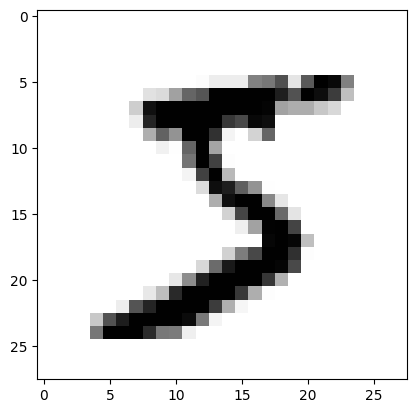

In [ ]:
digit = x.to_numpy()[0]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image,cmap='binary')
plt.show()

In [ ]:
y = y.astype(np.uint8)
y[0]

np.uint8(5)

In [ ]:
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

In [ ]:
y_train_5 = (y_train ==5) # selecciona solo los valores de 5, tanto para el entrenamiento como para el test
y_test_5 = (y_test == 5)

In [ ]:
# SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_classifer = SGDClassifier()
sgd_classifer.fit(x_train,y_train_5)

SGDClassifier()

In [ ]:
sgd_classifer.predict([digit])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Medir el rendimiento

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifer,x_train,y_train_5,cv = 3, scoring='accuracy')


array([0.9667 , 0.95905, 0.95325])

# cv
El porcentaje de predicciones positivas que fueron correctas.
Significa la cantidad de particiones que se hace con los datos para su entrenamiento, y dependiendo de la cantidad de los datos puede tomar el valor.

| Tamaño del dataset             | Valor recomendado de `cv`                | Comentario                                                                                    |
| ------------------------------ | ---------------------------------------- | --------------------------------------------------------------------------------------------- |
| Pequeño (< 1,000)              | 5 a 10                                   | Más pliegues ayudan a aprovechar mejor los datos.                                             |
| Mediano a grande (como MNIST)  | 3 o 5                                    | 5 es un buen equilibrio entre tiempo y calidad de evaluación. 3 si el tiempo es muy limitado. |
| Muy grande (>100,000 muestras) | 3 o incluso `ShuffleSplit` personalizado | Para acelerar sin perder fiabilidad.                                                          |



#scoring
El porcentaje de verdaderos positivos que fueron detectados por el modelo.. Puede tomar 3 valores como:

| Métrica     | Enfocado en evitar... | Útil cuando...                                |
| ----------- | --------------------- | --------------------------------------------- |
| `precision` | Falsos positivos      | Importa más ser exacto que exhaustivo         |
| `recall`    | Falsos negativos      | Importa más capturar todos los positivos      |
| `f1`        | Ambos (equilibrio)    | Buscas un equilibrio entre precisión y recall |

#f1
La media armónica entre precisión y recall.

Fórmula:

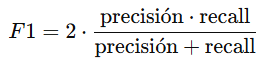


Cuándo usarlo:
Cuando quieres un balance entre precisión y recall, especialmente si las clases están desbalanceadas.

### Mtriz de confusion

|||
|--|--|
|TN|FP|
|FN|TP|

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifer,x_train,y_train_5,cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53823,   756],
       [ 1692,  3729]])

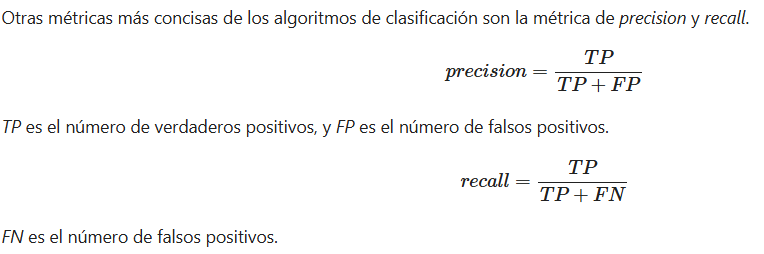

In [ ]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.831438127090301
0.6878804648588821


Existe una métrica que combina los valores de precision y recall llamada F1 score. La métrica F1 score es el promedio armonico (harmonic mean) de precision y recall. Mientras el promedio regular trata todos los valores de la misma manera, el promedio armónico da más peso a los valores pequeños. Como resultado, el clasificador obtiene un valor alto de F1 si precision y recall son altos.

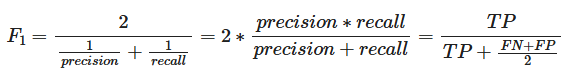

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7528770442156268

### REGRESIÓN LOGISTICA

In [2]:
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [3]:
data = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = data.iloc[:,[2,3]]
y = data.iloc[:,-1].values

In [5]:
gender = data[['Gender']]
gender

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
395,Female
396,Male
397,Female
398,Male


In [6]:
from sklearn.preprocessing import OneHotEncoder
cat_enocoder = OneHotEncoder()
data_cat_1hot = cat_enocoder.fit_transform(gender)

In [7]:
print(data_cat_1hot)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 400 stored elements and shape (400, 2)>
  Coords	Values
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 1)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 0)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (375, 0)	1.0
  (376, 0)	1.0
  (377, 0)	1.0
  (378, 1)	1.0
  (379, 0)	1.0
  (380, 1)	1.0
  (381, 1)	1.0
  (382, 0)	1.0
  (383, 1)	1.0
  (384, 0)	1.0
  (385, 1)	1.0
  (386, 0)	1.0
  (387, 1)	1.0
  (388, 1)	1.0
  (389, 0)	1.0
  (390, 1)	1.0
  (391, 1)	1.0
  (392, 0)	1.0
  (393, 1)	1.0
  (394, 0)	1.0
  (395, 0)	1.0
  (396, 1)	1.0
  (397, 0)	1.0
  (398, 1)	1.0
  (399, 0)	1.0


In [8]:
cat_enocoder.categories_

[array(['Female', 'Male'], dtype=object)]

In [9]:
data_cat_1hot.toarray()[:3]

array([[0., 1.],
       [0., 1.],
       [1., 0.]])

In [10]:
encoded_df = pd.DataFrame(data_cat_1hot.toarray().astype(int),columns=cat_enocoder.get_feature_names_out())
encoded_df.head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [11]:
data1 = pd.concat([x,encoded_df],axis=1) # junta las columnas
data1.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [12]:
data1.shape

(400, 4)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size= 0.2, random_state = 0)

In [14]:
print(x_train.shape)
print(x_test.shape)

(320, 4)
(80, 4)


In [15]:
# En este punto lo que se esta haciendo es que se esta escalando las variables independientes (solo se puede escalar las variables dependientes)
# ya que el valor del sueldo es muy elevado en comparación de las demas variables.
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train) # se usa fit en este caso, porque aprende a escalar con datos como media y desviacion estandar, despues escala
x_test = sc_x.transform(x_test) # solo escala, ya que aprendio a escalar

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [17]:
y_pred = log_reg.predict(x_test)

In [18]:
print('Reales: ',y_test[:10], 'Predicción: ',y_pred[:10])

Reales:  [0 0 0 0 0 0 0 1 0 0] Predicción:  [0 0 0 0 0 0 0 1 0 1]


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[56,  2],
       [ 5, 17]])

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Presición: ', precision_score(y_test, y_pred))
print('Memoria: ', recall_score(y_test,y_pred))
print('F1_score: ', f1_score(y_test,y_pred))

Presición:  0.8947368421052632
Memoria:  0.7727272727272727
F1_score:  0.8292682926829268


### K-NN
Clasifica según las clases de los vecinos más cercanos.

In [31]:
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
# esto es solo cuando se cargo anteriormente los datos
# para borrar los datos que se sucbió
os.remove("Advertising.csv")

In [32]:
data = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
x = data.iloc[:,[2,3]]
y = data.iloc[:,-1].values

In [34]:
gender = data[['Gender']]
gender

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
395,Female
396,Male
397,Female
398,Male


In [35]:
from sklearn.preprocessing import OneHotEncoder
cat_enocoder = OneHotEncoder()

In [36]:
data_cat_1hot = cat_enocoder.fit_transform(gender)

In [37]:
encoded_df = pd.DataFrame(data_cat_1hot.toarray().astype(int),columns=cat_enocoder.get_feature_names_out())
encoded_df.head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [38]:
data1 = pd.concat([x,encoded_df],axis=1) # junta las columnas
data1.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


In [39]:
data1.shape

(400, 4)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data1, y, test_size= 0.2, random_state = 0)

In [41]:
# En este punto lo que se esta haciendo es que se esta escalando las variables independientes (solo se puede escalar las variables dependientes)
# ya que el valor del sueldo es muy elevado en comparación de las demas variables.
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train) # se usa fit en este caso, porque aprende a escalar con datos como media y desviacion estandar, despues escala
x_test = sc_x.transform(x_test) # solo escala, ya que aprendio a escalar

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='minkowski', p=1)
knn.fit(x_train, y_train)


KNeighborsClassifier(p=1)

In [47]:
y_pred =  knn.predict(x_test)

In [49]:
print('Reales: ', y_test[:10], 'Predicción: ',y_pred[:10])

Reales:  [0 0 0 0 0 0 0 1 0 0] Predicción:  [0 0 0 0 0 0 0 1 0 1]


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[55,  3],
       [ 1, 21]])

In [51]:
from sklearn.metrics import precision_score, recall_score,f1_score
print('Presición: ',precision_score(y_test, y_pred))
print('Memoria: ',recall_score(y_test,y_pred))
print('F1_score: ',f1_score(y_test,y_pred))

Presición:  0.875
Memoria:  0.9545454545454546
F1_score:  0.9130434782608695


# Máquin de soporte vectorial   SVC

In [56]:
os.remove("Social_Network_Ads.csv") # borra los datos cargados anteriormente

In [57]:
# cargan los datos
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [60]:
from sklearn.preprocessing import OneHotEncoder # sirve para categorizar los datos
from sklearn.model_selection import train_test_split # sirve para el dividir los datos para entrenamiento y test
from sklearn.preprocessing import StandardScaler # sirve para escalar los datos

data = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))

x = data.iloc[:,[2,3]]
y = data.iloc[:,-1].values

gender = data[['Gender']]

# escalamiento de los datos
cat_enocoder = OneHotEncoder()

# transforma los datos categoricos a numericos
data_cat_1hot = cat_enocoder.fit_transform(gender)

# convierte en dataframe los datosnumericos con sus nombres de columnas correspondientes
encoded_df = pd.DataFrame(data_cat_1hot.toarray().astype(int),columns=cat_enocoder.get_feature_names_out())

# concadena las columnas
data1 = pd.concat([x,encoded_df],axis=1)

# divide los datos en entrenamiento y test
x_train,x_test, y_train, y_test = train_test_split(data1, y, test_size= 0.2, random_state = 0)

# escalar los datos
# En este punto lo que se esta haciendo es que se esta escalando las variables independientes (solo se puede escalar las variables dependientes)
# ya que el valor del sueldo es muy elevado en comparación de las demas variables.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train) # se usa fit en este caso, porque aprende a escalar con datos como media y desviacion estandar, despues escala
x_test = sc_x.transform(x_test) # solo escala, ya que aprendio a escalar

